In [1]:
import pandas as pd 
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_cat = df.select_dtypes("object")
df_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
df_num = df.select_dtypes("float64" , "int64")
df_num

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [10]:
from pandas.api.types import CategoricalDtype
cut_sira = ["Fair" , "Good" ,"Very Good" ,"Premium" ,"Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(ordered = True ,categories = cut_sira))
df["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

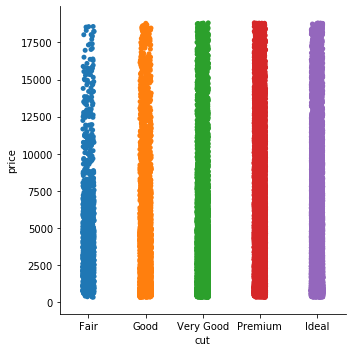

In [12]:
sns.catplot(data = df ,x = "cut" , y = "price")
# cut değişkenin price değişkenin değerlerine göre yoğunlugu

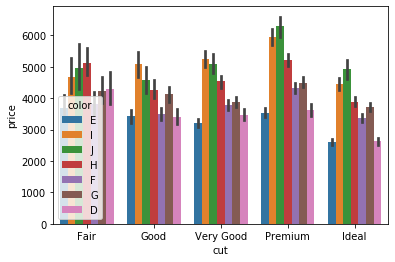

In [19]:
sns.barplot(data = df ,x = "cut" , y = "price" , hue = "color" );
# hue değeri 3. boyut katmaya yarar
# cut değişkenleri üzerindeki color kırlımları ile price temsil ediliyor
# iki groupby işlemi sonrası price değişkenin ortalaması alınır , cızgıler ise standart sapmadır (standart hata)

In [18]:
df.groupby(["cut" , "color"])["price"].mean()
# yukarıda yakpılan islem tam olarak bu

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337